In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

In [12]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [13]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None, None)

In [14]:
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)

In [15]:
y_ss_train.dtype

dtype('int64')

In [16]:
sdfasdf

NameError: name 'sdfasdf' is not defined

Neural Network

In [17]:
# Define the model
model = models.Sequential()

X_train_dim = X_ss_train.shape[1]

# Add input layer and hidden layers
model.add(layers.Dense(64, activation='relu', input_dim=X_train_dim))
model.add(layers.Dense(32, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])
#https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy#:~:text=Mathematically%20there%20is%20no%20difference,000%20samples)%20show%20no%20difference.

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2755 (10.76 KB)
Trainable params: 2755 (10.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Train the model
history = model.fit(X_ss_train, y_ss_train, epochs=30, batch_size=32, validation_data=(X_ss_val, y_ss_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

# You can use the model for predictions
predictions = model.predict(X_ss_test)

Epoch 1/30
9002/9002 [==============================] - 11s 1ms/step - loss: 0.5233 - accuracy: 0.7728 - val_loss: 0.5640 - val_accuracy: 0.7246
Epoch 2/30
9002/9002 [==============================] - 10s 1ms/step - loss: 0.4088 - accuracy: 0.8132 - val_loss: 0.5644 - val_accuracy: 0.7319
Epoch 3/30
9002/9002 [==============================] - 10s 1ms/step - loss: 0.3887 - accuracy: 0.8199 - val_loss: 0.5485 - val_accuracy: 0.7391
Epoch 4/30
9002/9002 [==============================] - 10s 1ms/step - loss: 0.3768 - accuracy: 0.8250 - val_loss: 0.5227 - val_accuracy: 0.7481
Epoch 5/30
9002/9002 [==============================] - 11s 1ms/step - loss: 0.3687 - accuracy: 0.8280 - val_loss: 0.5029 - val_accuracy: 0.7559
Epoch 6/30
9002/9002 [==============================] - 11s 1ms/step - loss: 0.3622 - accuracy: 0.8310 - val_loss: 0.5097 - val_accuracy: 0.7576
Epoch 7/30
9002/9002 [==============================] - 11s 1ms/step - loss: 0.3558 - accuracy: 0.8351 - val_loss: 0.4941 - val_ac

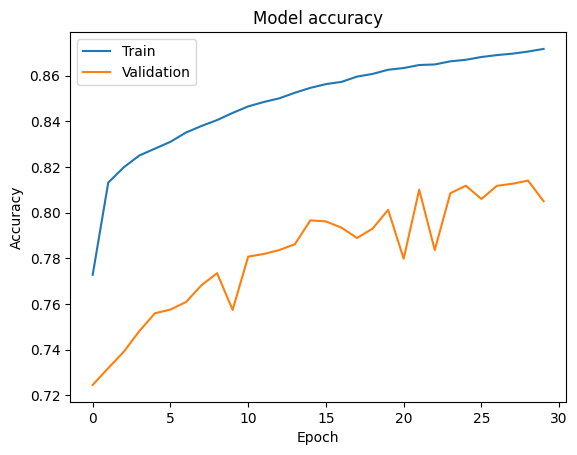

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/#:~:text=in%20general%2C%20it%20is%20not,greater%20than%2010%5E%2D6.

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

NEW ATTEMPT

In [ ]:
asdfsf

NameError: name 'asdfsf' is not defined

In [ ]:
param_grid = {
    #Didn't include 0 as that would mean the data was linearly separable
    'hidden_layers': [1, 2, 3, 4, 5],
    'neurons': [50, 100, 150, 200, 250, 300],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
    }

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import ModelCheckpoint

#Weights still assigned randomly but in a reproducible way
np.random.seed(7)
tf.random.set_seed(7)

def create_model(hidden_layers, neurons, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(3, activation='softmax'))  #3 classes and therefore cannot use Sigmoid
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Shape of input is same as my independent variables in training set
input_dim = X_ss_train.shape[1]


# lists
hidden_layers_list = []
neurons_list = []
dropout_rate_list = []
learning_rate_list = []
epochs_list = []
train_accuracy_list = []
val_accuracy_list = []

# Track the best model and its performance
best_model = None
best_epochs = float('inf')
best_accuracy = 0.0

# Iterate over hyperparameter combinations
for hidden_layers in param_grid['hidden_layers']:
    for neurons in param_grid['neurons']:
        for dropout_rate in param_grid['dropout_rate']:
            for learning_rate in param_grid['learning_rate']:
                print(f"Training model with {hidden_layers} hidden layers, {neurons} neurons, "
                      f"{dropout_rate} dropout, and {learning_rate} learning rate.")
                
                # Create the model
                model = create_model(hidden_layers, neurons, dropout_rate, learning_rate)
                
                # Set up early stopping - Patience chosen so that there's less of a chance of getting caught in a local minima 
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


                # Train the model
                history = model.fit(X_ss_train_sample, y_ss_train_sample, epochs=200, batch_size=32,
                                    validation_data=(X_ss_val_sample, y_ss_val_sample), callbacks=[early_stopping])
                

                
                # Get the number of epochs it took for early stopping
                epochs = len(history.history['loss'])
                print(f"Early stopped after {epochs} epochs.")
                
                #Evaliud
                _, train_accuracy = model.evaluate(X_ss_train_sample, y_ss_train_sample)

                # Evaluate on validation set
                _, val_accuracy = model.evaluate(X_ss_val_sample, y_ss_val_sample)
                print(f"Validation accuracy: {val_accuracy}\n")

                hidden_layers_list.append(hidden_layers)
                neurons_list.append(neurons)
                dropout_rate_list.append(dropout_rate)
                learning_rate_list.append(learning_rate)
                epochs_list.append(epochs)
                train_accuracy_list.append(train_accuracy)
                val_accuracy_list.append(val_accuracy)

                
                
                # Check if this model is the best so far
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_model = model
                    best_epochs = epochs
                    best_hidden_layers = hidden_layers
                    best_neurons = neurons
                    best_dropout_rate = dropout_rate
                    best_learning_rate = learning_rate


print(f"Best model achieved {best_accuracy} accuracy on the validation set after {best_epochs} epochs, {best_hidden_layers} layers, {best_neurons} neurons, {best_dropout_rate} dropout rate and {best_learning_rate} learning rate")

params_df = pd.DataFrame({'hidden layers': hidden_layers_list, 'neurons': neurons_list, 'dropout rate': dropout_rate_list, 'learning rate': learning_rate_list, 'epochs': epochs_list, 'train accuracy': train_accuracy_list, 'val accuracy': val_accuracy_list})

Training model with 1 hidden layers, 50 neurons, 0.1 dropout, and 0.0001 learning rate.
Epoch 1/200
451/451 [==============================] - 1s 1ms/step - loss: 1.1590 - accuracy: 0.3654 - val_loss: 1.0029 - val_accuracy: 0.5992
Epoch 2/200
451/451 [==============================] - 0s 1ms/step - loss: 1.0345 - accuracy: 0.4706 - val_loss: 0.9525 - val_accuracy: 0.6303
Epoch 3/200
451/451 [==============================] - 0s 1ms/step - loss: 0.9877 - accuracy: 0.5146 - val_loss: 0.9374 - val_accuracy: 0.5984
Epoch 4/200
451/451 [==============================] - 0s 1ms/step - loss: 0.9635 - accuracy: 0.5298 - val_loss: 0.9357 - val_accuracy: 0.5862
Epoch 5/200
451/451 [==============================] - 0s 1ms/step - loss: 0.9516 - accuracy: 0.5391 - val_loss: 0.9272 - val_accuracy: 0.5903
Epoch 6/200
451/451 [==============================] - 0s 1ms/step - loss: 0.9436 - accuracy: 0.5409 - val_loss: 0.9273 - val_accuracy: 0.5855
Epoch 7/200
451/451 [==============================] -

In [ ]:
params_df.sort_values('accuracy', axis=0, ascending=False, inplace=True)
params_df = params_df.reset_index(drop=True)
params_df.to_csv('params.csv')

In [ ]:
params_df.head(10)

In [ ]:
#Model with the highest validation accuracy
model = create_model(4, 300, 0.1, 0.001)
model.fit(X_ss_train, y_ss_train, epochs=50, batch_size=32, validation_data=(X_ss_val, y_ss_val))

Epoch 1/50
9002/9002 [==============================] - 63s 7ms/step - loss: 0.4330 - accuracy: 0.8070 - val_loss: 0.4584 - val_accuracy: 0.7959
Epoch 2/50
9002/9002 [==============================] - 69s 8ms/step - loss: 0.3129 - accuracy: 0.8632 - val_loss: 0.3515 - val_accuracy: 0.8452
Epoch 3/50
9002/9002 [==============================] - 77s 9ms/step - loss: 0.2665 - accuracy: 0.8857 - val_loss: 0.3046 - val_accuracy: 0.8694
Epoch 4/50
9002/9002 [==============================] - 74s 8ms/step - loss: 0.2382 - accuracy: 0.8986 - val_loss: 0.2658 - val_accuracy: 0.8861
Epoch 5/50
9002/9002 [==============================] - 80s 9ms/step - loss: 0.2190 - accuracy: 0.9078 - val_loss: 0.2576 - val_accuracy: 0.8870
Epoch 6/50
9002/9002 [==============================] - 67s 7ms/step - loss: 0.2061 - accuracy: 0.9131 - val_loss: 0.2301 - val_accuracy: 0.9008
Epoch 7/50
9002/9002 [==============================] - 59s 7ms/step - loss: 0.1957 - accuracy: 0.9177 - val_loss: 0.2140 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

845/845 [==============================] - 2s 2ms/step - loss: 0.1448 - accuracy: 0.9331
Test accuracy: 0.9330915808677673


In [ ]:
#Model with second highest accuracy but simpler
#create_model(hidden_layers, neurons, dropout_rate, learning_rate)
model = create_model(3, 300, 0.1, 0.001)
model.fit(X_ss_train, y_ss_train, epochs=41, batch_size=32, validation_data=(X_ss_val, y_ss_val))

Epoch 1/41
9002/9002 [==============================] - 59s 6ms/step - loss: 0.4316 - accuracy: 0.8081 - val_loss: 0.4590 - val_accuracy: 0.7934
Epoch 2/41
9002/9002 [==============================] - 49s 5ms/step - loss: 0.3143 - accuracy: 0.8626 - val_loss: 0.3621 - val_accuracy: 0.8389
Epoch 3/41
9002/9002 [==============================] - 51s 6ms/step - loss: 0.2677 - accuracy: 0.8844 - val_loss: 0.3068 - val_accuracy: 0.8688
Epoch 4/41
9002/9002 [==============================] - 45s 5ms/step - loss: 0.2395 - accuracy: 0.8985 - val_loss: 0.2784 - val_accuracy: 0.8841
Epoch 5/41
9002/9002 [==============================] - 43s 5ms/step - loss: 0.2197 - accuracy: 0.9073 - val_loss: 0.2500 - val_accuracy: 0.8940
Epoch 6/41
9002/9002 [==============================] - 74s 8ms/step - loss: 0.2053 - accuracy: 0.9136 - val_loss: 0.2376 - val_accuracy: 0.8996
Epoch 7/41
9002/9002 [==============================] - 48s 5ms/step - loss: 0.1955 - accuracy: 0.9178 - val_loss: 0.2170 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(X_ss_test, y_ss_test)
print(f'Test accuracy: {test_acc}')

845/845 [==============================] - 2s 2ms/step - loss: 0.1404 - accuracy: 0.9388
Test accuracy: 0.938753604888916


In [ ]:
y_test_pred_list  = []
for y in y_test_pred:
    if y==0:
        y_test_pred_list.append("Y")
    elif y == 2:
        y_test_pred_list.append("N")
    elif y==1:
        y_test_pred_list.append("T")

y_test_pred_df = pd.DataFrame(y_test_pred_list, columns=["Winner Bat First"])

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner Bat First', data=y_test_pred_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Did the Winner Bat First? SVM')
plt.show()